<a href="https://colab.research.google.com/github/stakunlena/ich_python_for_DA_HW/blob/main/Stakun_HW_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашняя работа №21**

1. Используйте набор данных California Housing, чтобы сравнить эффективность линейной регрессии и деревьев решений при прогнозировании цен на жилье.
1. Используйте набор данных Wine, чтобы предсказать качество вина на основе его химических свойств. Выберите две модели из пройденных и сравните их эффективность.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Сравнение эффективности линейной регрессии и деревьев решений при прогнозировании цен на жилье.

Сравнение моделей:
                        MAE      RMSE        R2
Linear Regression  0.533200  0.745581  0.575788
Decision Tree      0.500804  0.705184  0.620513


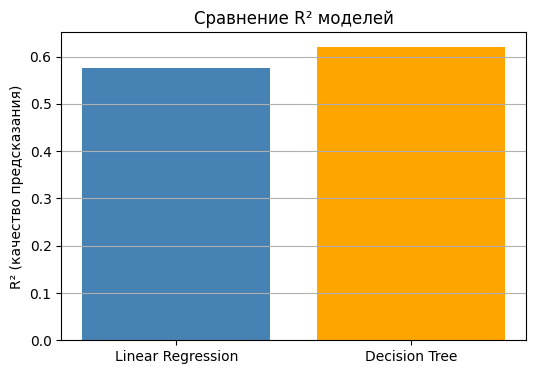

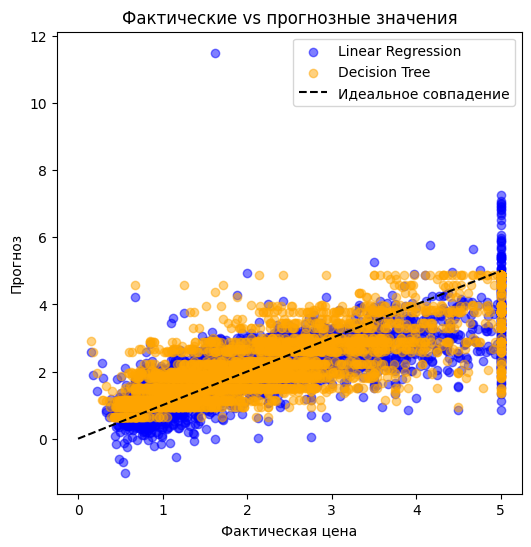

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Загрузка данных
data = fetch_california_housing(as_frame=True)
df = data.frame
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Модель 1: Линейная регрессия
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 4. Модель 2: Дерево решений
tree_model = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# 5. Оценка качества
def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

results = pd.DataFrame({
    "Linear Regression": evaluate(y_test, y_pred_lr),
    "Decision Tree": evaluate(y_test, y_pred_tree)
}).T

print("Сравнение моделей:")
print(results)

# 6. Визуализация результатов
plt.figure(figsize=(6, 4))
plt.bar(results.index, results["R2"], color=["steelblue", "orange"])
plt.title("Сравнение R² моделей")
plt.ylabel("R² (качество предсказания)")
plt.grid(axis="y")
plt.show()

# 7. Диаграмма фактических vs прогнозных значений
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression", color="blue")
plt.scatter(y_test, y_pred_tree, alpha=0.5, label="Decision Tree", color="orange")
plt.plot([0, 5], [0, 5], "k--", label="Идеальное совпадение")
plt.xlabel("Фактическая цена")
plt.ylabel("Прогноз")
plt.legend()
plt.title("Фактические vs прогнозные значения")
plt.show()

Линейная регрессия работает хуже, потому что предполагает строго линейную связь между признаками и целевой переменной

Размер данных: (178, 13)
Классы качества вина: [0 1 2]

Сравнение точности моделей:
Логистическая регрессия: 0.972
Случайный лес:           1.000

=== Отчёт по классам (Logistic Regression) ===
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


=== Отчёт по классам (Random Forest) ===
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



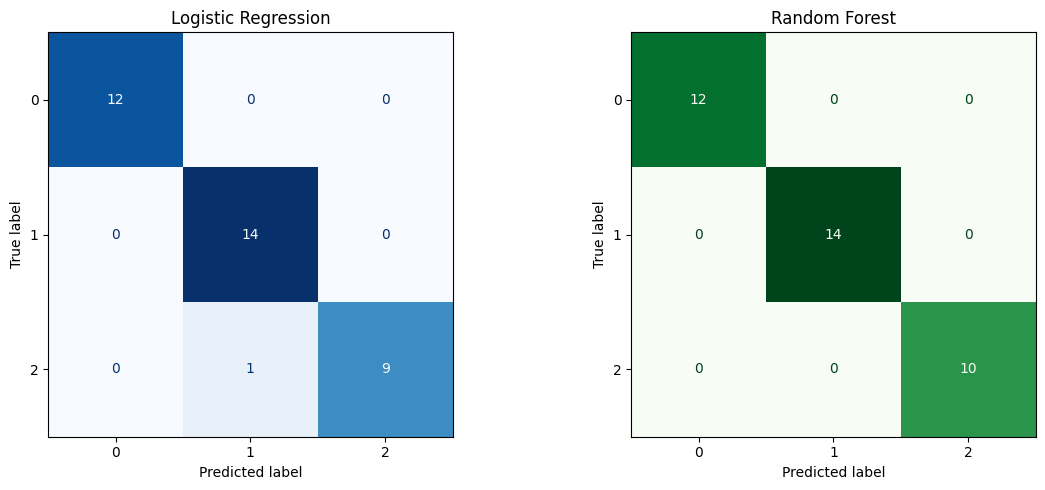

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Загрузка данных ===
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Размер данных:", X.shape)
print("Классы качества вина:", np.unique(y))

# 2. Разделение данных ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Масштабирование признаков для линейной модели ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Модель 1: Логистическая регрессия ===
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# 5. Модель 2: Случайный лес ===
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 6. Оценка точности ===
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\nСравнение точности моделей:")
print(f"Логистическая регрессия: {acc_lr:.3f}")
print(f"Случайный лес:           {acc_rf:.3f}")

# 7. Отчёты по классам ===
print("\n=== Отчёт по классам (Logistic Regression) ===")
print(classification_report(y_test, y_pred_lr, target_names=data.target_names))

print("\n=== Отчёт по классам (Random Forest) ===")
print(classification_report(y_test, y_pred_rf, target_names=data.target_names))

# 8. Визуализация матриц ошибок ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot(ax=axes[0], cmap="Blues", colorbar=False)
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(ax=axes[1], cmap="Greens", colorbar=False)
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

* Логистическая регрессия показывает высокую точность (97%), однако есть небольшие ошибки между классами 1 и 2, что говорит о наличии нелинейных взаимодействий между признаками.
* Случайный лес показал идеальную классификацию (100%) на тестовой выборке